In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [242]:
#names = pd.read_text("imports-85.names")
column_names = ['symboling', 'normalized-losses','make', 'fuel-type', 'aspiration', 'num-of-doors',
               'body-style','drive-wheels', 'engine-location', 'wheel-base', 'lenght', 'width', 'height',
               'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
               'stroke', 'compression-ratio', 'hoursepower', 'peak-rpm', 'city-mpg', 'highway-mpg','price']
raw_dataset = pd.read_csv('imports-85.data',na_values = "?")

raw_dataset = pd.DataFrame(raw_dataset.values, columns = column_names)
dataset = raw_dataset.copy()
#dataset["aspiration"]
#len(column_names)

In [243]:
dataset["normalized-losses"]= dataset["normalized-losses"].fillna(dataset["normalized-losses"].mean())
dataset["bore"]= dataset["bore"].fillna(dataset["bore"].mean())
dataset["stroke"]= dataset["stroke"].fillna(dataset["stroke"].mean())
dataset["hoursepower"]= dataset["hoursepower"].fillna(dataset["hoursepower"].mean())
dataset["peak-rpm"]= dataset["peak-rpm"].fillna(dataset["peak-rpm"].mean())
dataset["price"]= dataset["price"].fillna(dataset["price"].mean())
#dataset

In [244]:
dataset.pop("normalized-losses")
target = dataset.pop("price")
dataset.pop("fuel-system")
dataset.pop("symboling")
dataset.pop("drive-wheels")
dataset.pop("engine-location")
dataset.pop("aspiration")
dataset.pop("num-of-doors")
target.shape

(204,)

In [245]:
make = []
for i in dataset["make"]:
    if i == "alfa-romero":
        make.append(0)
    elif i == "audi":
        make.append(1)
    elif i == "bmw":
        make.append(2)
    elif i == "chevrolet":
        make.append(3)
    elif i == "dodge":
        make.append(4)
    elif i == "honda":
        make.append(5)
    elif i == "isuzu":
        make.append(6)
    elif i == "jaguar":
        make.append(7)
    elif i == "mazda":
        make.append(8)
    elif i == "mercedes-benz":
        make.append(9)
    elif i == "mercury":
        make.append(10)
    elif i == "mitsubishi":
        make.append(11)
    elif i == "nissan":
        make.append(12)
    elif i == "peugot":
        make.append(13)
    elif i == "plymouth":
        make.append(14)
    elif i == "porsche":
        make.append(15)
    elif i == "renault":
        make.append(16)
    elif i == "saab":
        make.append(17)
    elif i == "subaru":
        make.append(18)
    elif i == "toyota":
        make.append(19)
    elif i == "volkswagen":
        make.append(20)
    elif i == "volvo":
        make.append(21)
make = np.asarray(make)
dataset["make"] = make

In [246]:
body_style = []
for i in dataset["body-style"]:
    if i == "hardtop":
        body_style.append(0)
    elif i == "wagon":
        body_style.append(1)
    elif i == "sedan":
        body_style.append(2)
    elif i == "convertible":
        body_style.append(3)
    elif i == "hatchback":
        body_style.append(4)

body_style = np.asarray(body_style)
dataset["body-style"] = body_style

In [247]:
num_of_cylinders = []
for i in dataset["num-of-cylinders"]:
    if i == "eight":
        num_of_cylinders.append(0)
    elif i == "five":
        num_of_cylinders.append(1)
    elif i == "four":
        num_of_cylinders.append(2)
    elif i == "six":
        num_of_cylinders.append(3)
    elif i == "three":
        num_of_cylinders.append(4)
    elif i == "twelve":
        num_of_cylinders.append(5)
    elif i == "two":
        num_of_cylinders.append(6)

num_of_cylinders = np.asarray(num_of_cylinders)
dataset["num-of-cylinders"] = num_of_cylinders
num_of_cylinders.shape

(204,)

In [248]:
engine_types =[]
for i in dataset["engine-type"]:
    if i == "dohc":
        engine_types.append(0)
    elif i == "dohcv":
        engine_types.append(1)
    elif i == "l":
        engine_types.append(2)
    elif i == "ohc":
        engine_types.append(3)
    elif i == "ohcf":
        engine_types.append(4)
    elif i == "ohcv":
        engine_types.append(5)
    elif i == "rotor":
        engine_types.append(6)

engine_types = np.asarray(engine_types)
dataset["engine-type"] = engine_types
engine_types.shape

(204,)

In [249]:
fuel_types = []
for i in dataset["fuel-type"]:
    if i == "diesel":
        fuel_types.append(0)
    elif i == "gas":
        fuel_types.append(1)

fuel_types = np.asarray(fuel_types)
dataset["fuel-type"] = fuel_types
fuel_types.shape

(204,)

In [253]:
dataset

,bias,make,fuel-type,body-style,wheel-base,lenght,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,hoursepower,peak-rpm,city-mpg,highway-mpg
0,1,0,1,3,88.6,168.8,64.1,48.8,2548,0,2,130,3.47,2.68,9,111.0,5000.0,21,27
1,1,0,1,4,94.5,171.2,65.5,52.4,2823,5,3,152,2.68,3.47,9,154.0,5000.0,19,26
2,1,1,1,2,99.8,176.6,66.2,54.3,2337,3,2,109,3.19,3.40,10,102.0,5500.0,24,30
3,1,1,1,2,99.4,176.6,66.4,54.3,2824,3,1,136,3.19,3.40,8,115.0,5500.0,18,22
4,1,1,1,2,99.8,177.3,66.3,53.1,2507,3,1,136,3.19,3.40,8.5,110.0,5500.0,19,25
5,1,1,1,2,105.8,192.7,71.4,55.7,2844,3,1,136,3.19,3.40,8.5,110.0,5500.0,19,25
6,1,1,1,1,105.8,192.7,71.4,55.7,2954,3,1,136,3.19,3.40,8.5,110.0,5500.0,19,25
7,1,1,1,2,105.8,192.7,71.4,55.9,3086,3,1,131,3.13,3.40,8.3,140.0,5500.0,17,20
8,1,1,1,4,99.5,178.2,67.9,52,3053,3,1,131,3.13,3.40,7,160.0,5500.0,16,22
9,1,2,1,2,101.2,176.8,64.8,54.3,2395,3,2,108,3.50,2.80,8.8,101.0,5800.0,23,29


In [252]:
bias = []
for i in range(204):
    bias.append(1)
bias = np.asarray(bias)
dataset.insert (0, "bias", bias)
dataset

ValueError: cannot insert bias, already exists

In [254]:
target.shape

(204,)

In [255]:
dataset.to_csv('datafile.csv', header=False, index=False)
target.to_csv('target.csv', header=False, index=False)

In [256]:
dataset = pd.read_csv("datafile.csv")
target = pd.read_csv("target.csv")

In [257]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2,random_state=0)
print(x_train.shape)
print(y_test.shape)

(162, 19)
(41, 1)


In [207]:
trans_x_train = np.transpose(x_train)
XTX = trans_x_train.dot(x_train)
XTY = trans_x_train.dot(y_train)
XTY.shape

(19, 1)

In [181]:
y_train.shape

(162, 19)

In [258]:
#using gaussian elimination method
betaGE = np.linalg.solve(XTX, XTY)
betaGE

array([[-3.96003596e+04],
       [-1.91411977e+02],
       [-1.38450088e+04],
       [-7.16278120e+01],
       [ 4.13739422e+01],
       [ 6.47162435e+01],
       [ 5.78131355e+02],
       [ 6.29853493e+01],
       [ 6.24424701e-01],
       [ 3.14249662e+02],
       [ 6.15489038e+02],
       [ 1.25091744e+02],
       [-7.01301785e+02],
       [-3.48801585e+03],
       [-8.08884940e+02],
       [-4.47299452e+00],
       [ 2.66442466e+00],
       [ 1.95171980e+01],
       [-2.16052370e+01]])

In [260]:
#using QR decomposition
q, r = np.linalg.qr(XTX)
p = np.dot(q.T, XTY)
betaQR = np.dot(np.linalg.inv(r), p)
betaQR

array([[-3.96003609e+04],
       [-1.91411978e+02],
       [-1.38450086e+04],
       [-7.16278093e+01],
       [ 4.13739411e+01],
       [ 6.47162435e+01],
       [ 5.78131368e+02],
       [ 6.29853540e+01],
       [ 6.24424673e-01],
       [ 3.14249662e+02],
       [ 6.15489044e+02],
       [ 1.25091744e+02],
       [-7.01301762e+02],
       [-3.48801583e+03],
       [-8.08884933e+02],
       [-4.47299464e+00],
       [ 2.66442467e+00],
       [ 1.95171991e+01],
       [-2.16052370e+01]])

In [261]:
#to predict
predictionGE = x_test.dot(betaGE)
predictionQR = x_test.dot(betaGE)
predictionQR

,0
18,7841.763028
45,30995.035587
33,9512.779792
37,12179.111089
109,18265.435545
90,6620.928004
5,21362.977112
124,22401.089603
12,19844.017942
153,6263.612306


In [265]:
errorQR = np.subtract(y_test, predictionQR)
errorGE = np.subtract(y_test, predictionGE)
print(errorGE)
print(errorQR)

          16500.0
18   -1266.763028
45    1254.964413
33   -2217.779792
37   -3334.111089
109  -2685.435545
90     228.071996
5    -2442.977112
124  10126.910397
12    4720.982058
153   2514.387694
61   -3761.221250
186   1815.748439
166  -1795.548713
160   3233.154328
155   1361.548433
7    -4961.236008
129   -538.321718
131   -723.114712
75    -539.086531
66    3274.484450
44    -559.920618
146  -2262.900055
63    2297.034829
135   5885.423719
86   -2240.289610
141   -957.849435
187   3908.458870
181   -333.609329
161   2133.708172
96    1679.541803
202   6062.272895
60   -2181.968333
16    3953.650306
74   -1375.138965
80   -2548.454849
22   -1243.672770
71     -29.835043
97   -1940.124960
4    -3512.662583
162   2435.108931
125  11626.910397
          16500.0
18   -1266.763028
45    1254.964413
33   -2217.779792
37   -3334.111089
109  -2685.435545
90     228.071996
5    -2442.977112
124  10126.910397
12    4720.982058
153   2514.387694
61   -3761.221250
186   1815.748439
166  -1795

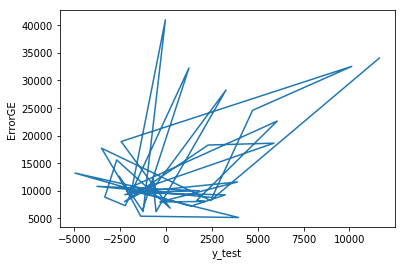

In [266]:
plt.plot(errorGE,y_test)
plt.ylabel("ErrorGE")
plt.xlabel("y_test")
plt.show()

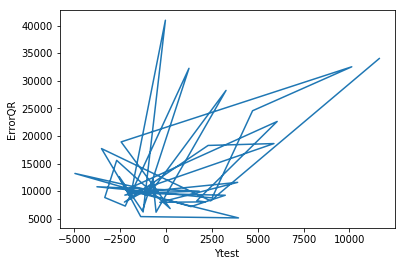

In [267]:
plt.plot(errorQR,y_test)
plt.ylabel("ErrorQR")
plt.xlabel("Ytest")
plt.show()

In [268]:
# Average residual Error
averageGE = np.mean(errorGE)
averageQR = np.mean(errorQR)
print(averageGE, averageQR)

16500.0    611.227807
dtype: float64 16500.0    611.227807
dtype: float64


In [269]:
RMSE_GE = np.sqrt((np.sum(errorGE)**2)/len(errorGE))
RMSE_QR = np.sqrt((np.sum(errorQR)**2)/len(errorQR))
print(RMSE_GE)
print(RMSE_QR)



16500.0    3913.767585
dtype: float64
16500.0    3913.767585
dtype: float64
